In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

yessss
>>>>>>>>>>>> LOADOING THE V2 OF FEATURES
fndjngkjdfs --NN-sim
['/figures']


In [2]:
import stats.stats_re as stats
import yaml

In [3]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [4]:
PATH = ['/master/code/last/finished_exps/simplest']
MODEL_PATH = '/master/code/last/models'
MODEL = 'simplest'

In [5]:
def loadModel(modelName:str, d, path = MODEL_PATH):
    """ 
    Function to import the model

    Args:
    -----
        - `modelName`: name of the model
        - `inputShape`: inout shape of the NN
        - `edges_shape`: edge shape of the NN
        - `path`: path where the models are
    """

    sys.path.append(path)

    loadFun = __import__(f'{modelName}', fromlist = ('loadNetwork'))

    #model = loadFun.loadNetwork(inputShape, edges_shape)
    model = loadFun.loadNetwork(d)

    return model


In [6]:
def getModel(cfg, std_path, device = DEVICE, model_path = MODEL_PATH):

    with open(cfg, 'r') as file:
        cfg = yaml.safe_load(file) 

    trainingInfos = cfg['training']

    d_model = trainingInfos['cfg_mod'][f'{trainingInfos["cfg_mod"]["model_name"]}']


    model = loadModel(MODEL, d_model, model_path)



    state_dict = torch.load(std_path, map_location = 'cpu')

    model.load_state_dict(state_dict)

    model.eval()

    model = model.to(device)

    return model

    

In [7]:
## stuff to load

In [8]:
class id():
    def __init__(self):
        self.dropout = None
        self.l1 = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.action_r = None
        self.cfg = None


    def load_id(self, path:str):
        try:
            if 'scaleL1' in path:
                nb_layer_match = re.search(r'scaleL1-(\d+\.\d+|\d+)', path)
                self.l1 = float(nb_layer_match.group(1))
            dropout_match = re.search(r'dropout-(\d+)', path)


            if 'action' in path:
                self.action_r = 1
            else:
                0



            self.dropout = int(dropout_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
            self.cfg = os.path.join(os.path.dirname(os.path.dirname(path)), 'cfg.yml')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_action-{self.action_r}_dropout{self.dropout}_l1-{self.l1}'
    

def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res




res = []

for path in PATH:
    res.extend(get_path_models(path))

In [9]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/simplest_best.pt >>> {'dropout': 0, 'l1': 0.0001, 'path': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/simplest_best.pt', 'loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'action_r': None, 'cfg': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/cfg.yml'}
/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-1/model_trained/simplest_best.pt >>> {'dropout': 1, 'l1': 0.0001, 'path': '/master/code/last/finished_exps/simplest

# =====================

In [10]:
normal_runs = []
noisy_runs = []


for r in res:
    if r.data_type == 'normal':
        normal_runs.append(r)
    elif r.data_type == 'noisy':
        normal_runs.append(r)

In [11]:
normal_models_l1 = []
normal_l1_val = []

noisy_models_l1 = []
noisy_l1_val = []


for r in normal_runs:
    if r.data_type == 'normal':
        if r.dropout == 0:
            l1_val = r.l1
            normal_l1_val.append(l1_val)


            normal_models_l1.append(r)



for r in noisy_runs:
    if r.data_type == 'noisy':
        if r.dropout == 0:
            l1_val = r.l1
            normal_l1_val.append(l1_val)


            normal_models_l1.append(r)


# ===================

In [12]:
NB_SIM = 10


def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 1000


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params


params1 = getParams()

params2 = getParams()
params2.noisy = 1


data_gt_1  = gen.get_mult_data(params1, NB_SIM)
graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1 = array2List(data_gt_1)


#data_gt_2 = gen.get_mult_data(params2, NB_SIM)
#graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
#data_gt_list_2 = array2List(data_gt_2)

0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [02:07<00:00,  7.87it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [02:11<00:00,  7.61it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [02:03<00:00,  8.06it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [01:56<00:00,  8.60it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


 83%|████████▎ | 832/999 [01:39<00:22,  7.38it/s]

 83%|████████▎ | 833/999 [01:39<00:19,  8.34it/s]


# ======================

In [ ]:
x = data_gt_2.copy()
inds1 = np.arange(x.shape[1]-1)
inds2 = inds1 + 1

speeds = np.sum(x[:, inds2] - x[:, inds1], axis = -2)


s_mean = np.mean(speeds, axis = 0)
s_std = np.std(speeds, axis = 0)

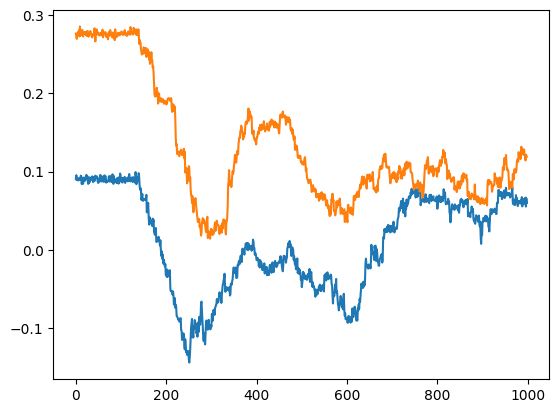

In [ ]:
plt.plot(s_mean)

# ====================

In [ ]:
import stats.stats_re as stats

In [ ]:
MSD_list_normal = []
RDF_list_normal = []
SCAT_list_normal = []
DISTR_list_normal = []
SUM_list_normal = []
MSE_rollout = []


a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)

MSD_base_normal = stats.MSD_stat(data_gt_1)
RDF_base_normal  = stats.apply_rdf(data_gt_1)
SCAT_base_normal = stats.applySelfScattering(data_gt_1)
DISTR_base_normal = stats.apply_hist(data_gt_1, a, b)
SUM_base_normal = stats.sumSpeeds(data_gt_1)        # issue wiht libtrayr

NameError: name 'x' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 10%|█         | 1/10 [00:42<06:26, 42.97s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 20%|██        | 2/10 [01:26<05:44, 43.12s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 30%|███       | 3/10 [02:26<05:57, 51.13s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 40%|████      | 4/10 [03:49<06:20, 63.48s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 50%|█████     | 5/10 [04:50<05:13, 62.67s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 60%|██████    | 6/10 [06:23<04:51, 72.95s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 70%|███████   | 7/10 [07:31<03:33, 71.33s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 80%|████████  | 8/10 [08:35<02:18, 69.08s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


 90%|█████████ | 9/10 [09:27<01:03, 63.69s/it]

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


100%|██████████| 10/10 [10:25<00:00, 62.56s/it]


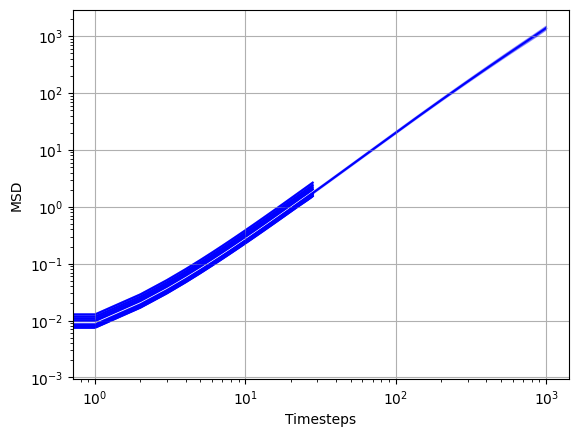

In [ ]:
a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)


start = 8
length = 300

stop = start+length



for i in tqdm(range(len(normal_models_l1))):

    ## load model
    cfg = normal_models_l1[i].cfg
    std_path = normal_models_l1[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_1, 
                                        initId = 8,
                                        nbStep = 30,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    #sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy()[:, :length],data_gt_1.copy()[:, start:stop])



    MSD_list_normal.append(msd)
    RDF_list_normal.append(rdf)
    SCAT_list_normal.append(scat)
    DISTR_list_normal.append(speed_distr)
    #SUM_list_normal.append(sum_speed)


In [33]:
for i in range(10):
    print(normal_models_l1[i].label())

noisy_action-None_dropout0_l1-0.0001
noisy_action-None_dropout0_l1-0.001
noisy_action-None_dropout0_l1-0.01
noisy_action-None_dropout0_l1-1.0
normal_action-None_dropout0_l1-0.0001
normal_action-None_dropout0_l1-0.001
normal_action-None_dropout0_l1-0.01
normal_action-None_dropout0_l1-1.0
noisy_action-1_dropout0_l1-None
normal_action-1_dropout0_l1-None


In [35]:
print(MSD_list_normal[0].shape)

(10, 999)


In [37]:
l1 = [normal_models_l1[i].l1 for i in range(len(normal_models_l1))]

print(l1)

[0.0001, 0.001, 0.01, 1.0, 0.0001, 0.001, 0.01, 1.0, None, None]


(10, 999)
(10, 29)
(10, 29)
(10, 29)
(10, 29)


IndexError: list index out of range

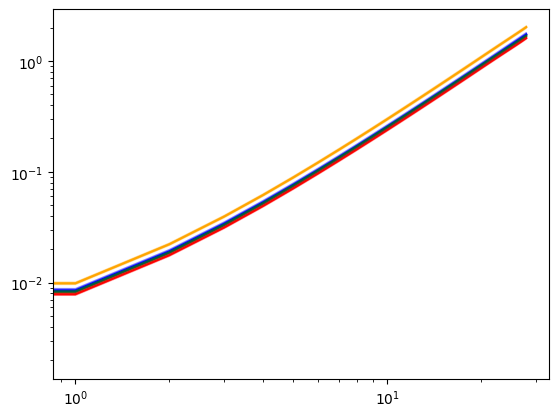

In [49]:
# plot of MSD

limit_msd = 29

l1 = [normal_models_l1[i].l1 for i in range(len(normal_models_l1))]
colors = ['blue', 'green', 'orange', 'red']

for i in range(len(l1)):
    print(MSD_list_normal[i][:limit_msd].shape)
    msd_mean = np.mean(MSD_list_normal[i][:, :limit_msd], axis = 0)
    msd_std = np.std(MSD_list_normal[i][:, :limit_msd], axis = 0)
    x = np.arange(limit_msd)
    plt.loglog(x, msd_mean, color = colors[i], zorder = 1, label = str(l1[i]))
    plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend()



In [60]:
print(SCAT_base_normal)

[[1.         0.97815387 0.91497399 ... 0.07263814 0.07888798 0.08284245]
 [1.         0.97949709 0.9200516  ... 0.02299987 0.02395648 0.02828894]
 [1.         0.97979369 0.92123695 ... 0.04918946 0.04850775 0.04944203]
 ...
 [1.         0.98114864 0.92649084 ... 0.05451247 0.06397164 0.07391378]
 [1.         0.98012912 0.92263629 ... 0.0265859  0.02067893 0.01551718]
 [1.         0.97994117 0.92182291 ... 0.05662789 0.08295425 0.11040756]]


IndexError: list index out of range

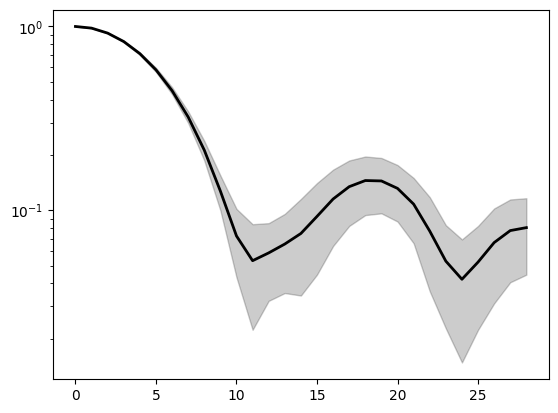

In [64]:
# plot of MSD

limit_scat = 29

l1 = [normal_models_l1[i].l1 for i in range(len(normal_models_l1))]
colors = ['blue', 'green', 'orange', 'red']


ssf_mean = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)
ssf_std = np.std(SCAT_base_normal[:, :limit_scat], axis = 0)
t = np.arange(limit_scat)
plt.semilogy(t, ssf_mean, color = 'k', lw=2)
plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = 'k', alpha = 0.2, zorder = 1)


for i in range(len(l1)):
    #print(MSD_list_normal[i][:limit_scat].shape)
    ssf_mean = np.mean(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    ssf_std = np.std(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    t = np.arange(limit_scat)
    plt.semilogy(t, ssf_mean, color = colors[i], lw=2)
    plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend()



In [69]:
print(RDF_base_normal[0])

[1.30471210e+04 1.49233062e+00 1.40563939e+00 1.47978723e+00
 1.43355249e+00 1.35710605e+00 1.25862062e+00 1.26587570e+00
 1.26055572e+00 1.11854237e+00 1.07166165e+00 1.06182251e+00
 1.01809535e+00 9.51045224e-01 9.13498279e-01 8.93493777e-01
 8.51657123e-01 7.81064388e-01 7.38939281e-01 7.22004046e-01
 6.60439049e-01 6.13048211e-01 6.00312497e-01 5.72245541e-01
 5.33611960e-01 4.84167647e-01 4.53765885e-01 4.38944120e-01
 3.90548543e-01 3.51110472e-01 3.24275349e-01 2.94410954e-01
 2.57166677e-01 2.20306011e-01 1.97672565e-01 1.72190687e-01
 1.40128507e-01 1.15386180e-01 9.27726354e-02 6.98463689e-02
 5.21581865e-02 3.91742461e-02 2.80198087e-02 2.05947140e-02
 1.59548540e-02 1.06340248e-02 7.20245010e-03 4.53363675e-03
 2.97963897e-03 3.89931235e-07]


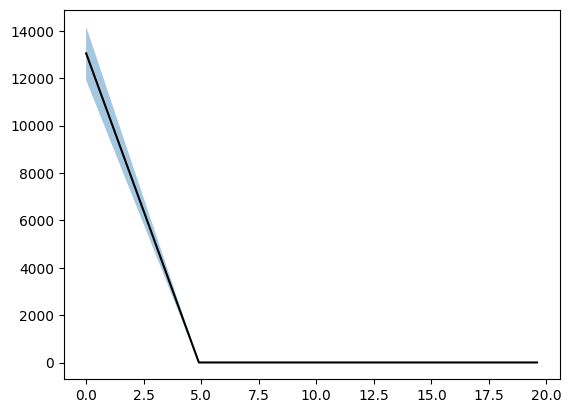

In [74]:
mean_res, std_res, r = RDF_base_normal
lim_rdf = 40


mean_res, std_res, r = mean_res[:lim_rdf], std_res[: lim_rdf], r[: lim_rdf]

plt.plot(r, mean_res, color = 'k', label = 'ground truth')
plt.fill_between(r, mean_res - std_res, mean_res+ std_res, alpha = 0.4)

In [76]:
magn_base, x_speed, y_speed = DISTR_base_normal

In [86]:
print( (magn_base_mean - magn_base_std).shape)
print(( magn_base_mean + magn_base_std).shape)

(99,)
(99,)


Text(0, 0.5, 'P(frac{v}{<v>})')

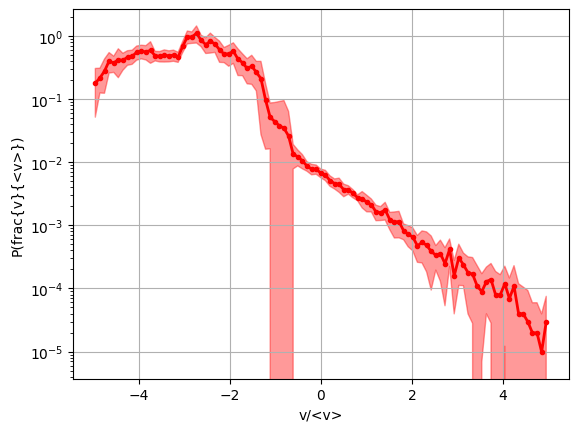

In [88]:
magn_base_mean = np.mean(magn_base, axis = 0)
magn_base_std = np.std(magn_base, axis = 0)


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'r.-',lw=2)
plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')


Text(0, 0.5, 'P(frac{v}{<v>})')

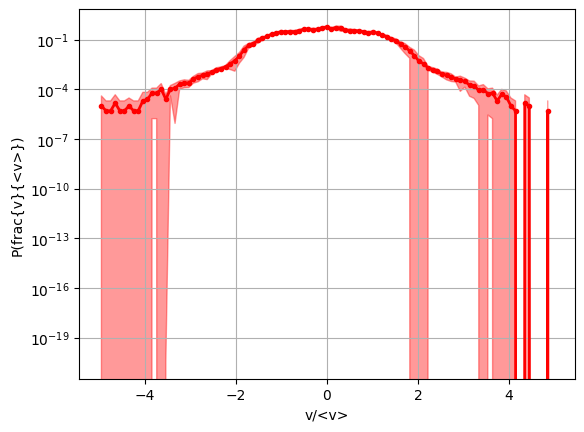

In [89]:
magn_base_mean = np.mean(x_speed, axis = 0)
magn_base_std = np.std(x_speed, axis = 0)


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'r.-',lw=2)
plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')


Text(0, 0.5, 'P(frac{v}{<v>})')

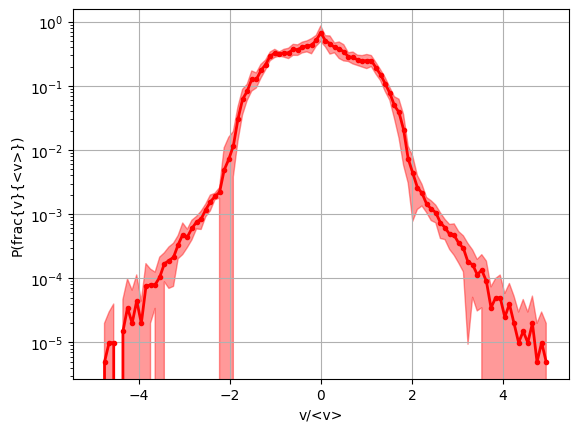

In [90]:
magn_base_mean = np.mean(y_speed, axis = 0)
magn_base_std = np.std(y_speed, axis = 0)


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'r.-',lw=2)
plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')


In [92]:
print(SUM_base_normal)

NameError: name 'SUM_base_normal' is not defined

In [ ]:
for i in range(len(l1)):
    magn, x, y = DISTR_list_normal
    magn_base_mean = np.mean(magn, axis = 0)
    magn_base_std = np.std(magn, axis = 0)
    
    plt.plot(sum_mean, color = colors[i], lw=2, label = str(l1[i]))
    #plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('Self-intermediate scattering functoin')
plt.grid()
plt.legend()

In [ ]:
MSD_list_noisy = []
RDF_list_noisy = []
SCAT_list_noisy = []
DISTR_list_noisy = []
SUM_list_noisy = []
MSE_rollout = []

MSD_list_noisy.append(stats.MSD_stat(data_gt_1))



a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)


start = 8
length = 15

stop = start+length



for i in tqdm(range(len(noisy_models_l1))):

    ## load model
    cfg = noisy_models_l1[i].cfg
    std_path = noisy_models_l1[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_1, 
                                        initId = 8,
                                        nbStep = 30,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy(),data_gt_1.copy())



    MSD_list_noisy.append(msd)
    RDF_list_noisy.append(rdf)
    SCAT_list_noisy.append(scat)
    DISTR_list_noisy.append(speed_distr)
    SUM_list_noisy.append(sum_speed)


# ====================

erros

In [ ]:
def get_gt_preds(model, graphs, device = DEVICE):

    list_gt = []
    list_preds = []

    with torch.no_grad():
    
        for graph in graphs:

            graph = graph.to(device)
            list_gt.append(graph.y[:, 0, :].cpu().detach().numpy())

            list_preds.append(model(graph).cpu().detach().numpy())

    return list_gt, list_preds

In [21]:
print(len(graphs_gt_1))

9890


In [ ]:
one_error_mean_list_normal = []
one_error_std_list_normal = []
data_gt = data_gt_1


a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)




## load model


## compute the trajectory

gts, preds = get_gt_preds(mdoel, graphs_gt_1)

# compute the stats

errors = np.abs(data_pred - data_gt)
errors_mean = np.mean(errors)
errors_std = np.std(errors)


one_error_mean_list_normal.append(errors_mean)
one_error_std_list_normal.append(errors_std)



# =============

In [ ]:
params1 = getParams()
params1.nbStep = 50

params2 = getParams()
params2.noisy = 1
params2.nbStep = 50


data_gt_1_roll  = gen.get_mult_data(params1, 100)
graphs_gt_1_roll  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1_roll = array2List(data_gt_1)


data_gt_2_roll = gen.get_mult_data(params2, 100)
graphs_gt_2_roll = gen.sims2Graphs(data_gt_2, params2.features_x)
data_gt_list_2_roll = array2List(data_gt_2)

In [ ]:
roll_error_mean_list_normal = []
roll_error_std_list_normal = []
data_gt = data_gt_1


a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)

start = 8
length = 15

stop = start+length



for i in range(len(normal_models_l1)):

    ## load model


    ## compute the trajectory

    data_pred = ...

    # compute the stats

    errors = np.abs(data_pred[:, :length] - data_gt[:, start:stop])
    errors_mean = np.mean(errors)
    errors_std = np.std(errors)


    one_error_mean_list_normal.append(errors_mean)
    one_error_std_list_normal.append(errors_std)



In [ ]:
def sumSpeeds(data):
    """
    [S, T, N, 2]
    """

    inds1 = np.arange(x.shape[1]-1)
    inds2 = inds1 + 1

    speeds = np.sum(x[:, inds2] - x[:, inds1], axis = -2)

    return speeds
